In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.strategy import StrategyBase, OptParam, OptParamArray
from backtester.swarms.ranking import SwarmRanker
from backtester.swarms.rebalancing import SwarmRebalance
from backtester.swarms.filters import SwarmFilter
from backtester.costs import CostsManagerEXOFixed
from backtester.exoinfo import EXOInfo
from backtester.swarms.rankingclasses import *
from backtester.swarms.swarm import Swarm


import pandas as pd
import numpy as np
import scipy

In [3]:
from strategies.strategy_pnf import StrategyPointAndFigurePatterns

In [4]:
from scripts.settings import *
try:
    from scripts.settings_local import *
except:
    pass

from exobuilder.data.exostorage import EXOStorage

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)


exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = ''  # ES Collars (incl Bearish, Bullish, BW and vanilla)

[print(exo) for exo in storage.exo_list(exo_filter)];

ES_BullishCollarBW
ES_BearishCollarBW
ES_CallSpread
ES_PutSpread
ES_ContFut
ZS_BullishCollarBW
ZS_BearishCollarBW
ZS_CallSpread
ZS_PutSpread
ZS_ContFut
CL_BullishCollarBW
CL_BearishCollarBW
CL_CallSpread
CL_PutSpread
CL_ContFut
ZW_BullishCollarBW
ZW_BearishCollarBW
ZW_CallSpread
ZW_PutSpread
ZW_ContFut
ZN_BullishCollarBW
ZN_BearishCollarBW
ZN_CallSpread
ZN_PutSpread
ZN_ContFut
NG_BullishCollarBW
NG_BearishCollarBW
NG_CallSpread
NG_PutSpread
NG_ContFut
ZC_BullishCollarBW
ZC_BearishCollarBW
ZC_CallSpread
ZC_PutSpread
ZC_ContFut
CL_SMART_Ichimoku_Long
ES_SMART_Ichimoku_Long
NG_SMART_Ichimoku_Long
ZC_SMART_Ichimoku_Long
ZS_SMART_Ichimoku_Long
ZW_SMART_Ichimoku_Long
ZN_SMART_Ichimoku_Long
CL_SMART_Ichimoku_VerticalSpread_Bullish
CL_SMART_Ichimoku_Straddle_Bullish
ES_SMART_Ichimoku_Straddle_Bullish
NG_SMART_Ichimoku_Straddle_Bullish
ZC_SMART_Ichimoku_Straddle_Bullish
ZS_SMART_Ichimoku_Straddle_Bullish
ZW_SMART_Ichimoku_Straddle_Bullish
ZN_SMART_Ichimoku_Straddle_Bullish
CL_SmartEXO_Ichi_Bull

## Script settings

In [175]:
STRATEGY_CONTEXT = {
    'strategy': { 
        'class': StrategyPointAndFigurePatterns,
        'exo_name': 'CL_SmartEXO_Ichi_Bullish_Straddle_150Delta_ExpHedged_test',        # <---- Select and paste EXO name from cell above
        'exo_storage': storage,
        'opt_params': [
                        #OptParam(name, default_value, min_value, max_value, step)
                        OptParamArray('Direction', [-1]),
                        OptParam('BoxSize', 1, 200, 300, 50),
                        OptParam('Reversal', 2, 2, 6, 2),
                        OptParamArray('MaxMinWindowPercent', [0.05]),
                        OptParam('ColumnConsecMoveCount', 2, 1, 1, 1),
                        OptParamArray('RulesIndex', np.arange(1)),
                        OptParam('MedianPeriod', 5, 38, 39, 10),
            
            ],
    },
    'swarm': {
        'members_count': 2,
        'ranking_class': RankerBestWithCorrel(window_size=-1, correl_threshold=0.5),
        'rebalance_time_function': SwarmRebalance.every_friday,

    },
    'costs':{
        'manager': CostsManagerEXOFixed,
        'context': {
            'costs_options': 3.0,
            'costs_futures': 3.0,
        }
    }
}

# Backtest class based strategy

In [176]:
smgr = Swarm(STRATEGY_CONTEXT)
smgr.run_swarm()
smgr.pick()

# Saving results to swarms directory
smgr.save('./swarms/')

### WARNING! Loading swarm from file (don't run next cell if you want new swarm instance)

In [177]:
#smgr = Swarm.load(strategy_context=STRATEGY_CONTEXT, directory='./swarms/')
#print('Loading: '+smgr.get_swarm_name())

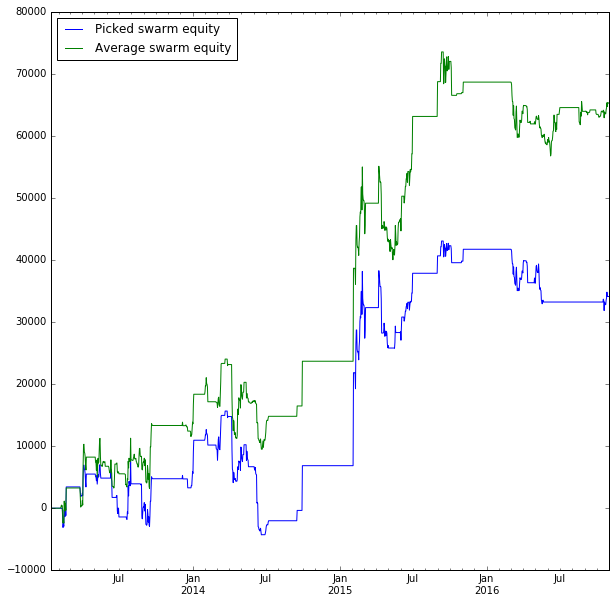

In [178]:
figsize(10,10)
smgr.picked_equity.plot(label='Picked swarm equity');
smgr.raw_equity.plot(label='Average swarm equity');
legend(loc=2);

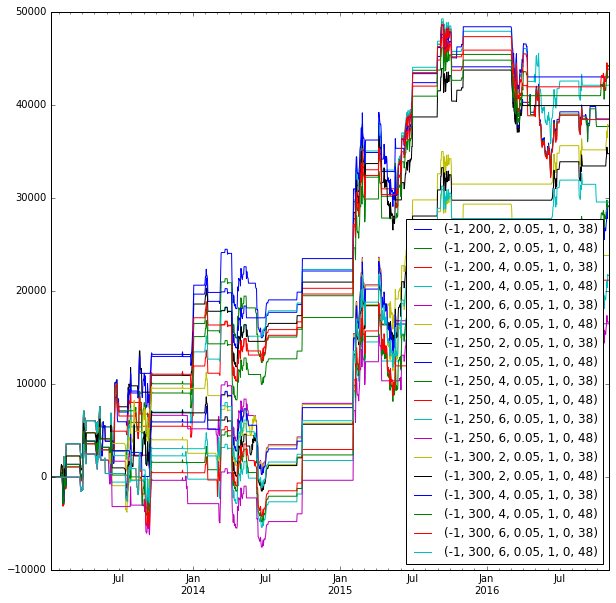

In [179]:
figsize(10,10)
smgr.raw_swarm.plot(legend=True)
legend(loc='lower right');

In [180]:
#
# To export swarms above to .csv, uncomment this
#

#swarm_df = smgr.swarm
#swarm_df.to_csv('./temp_swarms/ichi_swarm.csv')

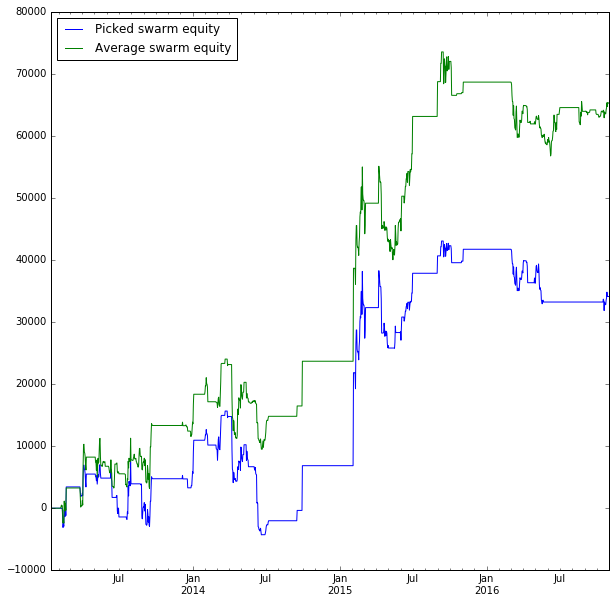

In [181]:
figsize(10,10)
smgr.picked_equity.plot(label='Picked swarm equity');
smgr.raw_equity.plot(label='Average swarm equity');
legend(loc=2);

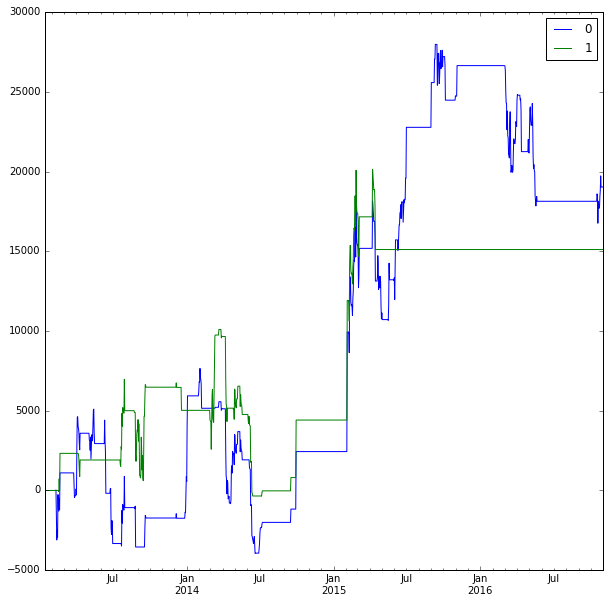

In [182]:
smgr.picked_swarm.plot()

# Swarm exposure

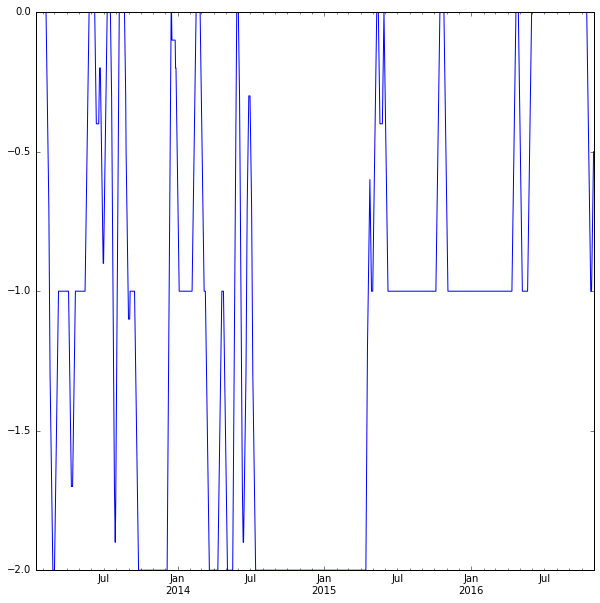

In [183]:
smgr.picked_exposure.sum(axis=1).rolling(10).mean().plot()

# Swarm statistics

#### Non-picked swarm stats

In [184]:
smgr.picked_stats

{'note:Not implemented yet'}

## Exo information

In [185]:
smgr.strategy.exoinfo.exo_info

{'dbdata': {'_id': ObjectId('5817ce7520bb1d0dfe615bcd'),
  'name': 'CL_SmartEXO_Ichi_Bullish_Straddle_150Delta_ExpHedged_test',
  'position': {'_realized_pnl': -17832.48030661934,
   'positions': {'203171332': {'leg_name': 'bullish',
     'qty': 2.0,
     'value': 4223.879765786983},
    '203179171': {'leg_name': '', 'qty': -2.0, 'value': -352.1255013551734},
    '203183071': {'leg_name': '', 'qty': -4.0, 'value': -1008.598230725159},
    '203183077': {'leg_name': '', 'qty': 1.0, 'value': 977.1626018232205}}},
  'series': b'\x80\x03cpandas.core.frame\nDataFrame\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00_dataq\x03cpandas.core.internals\nBlockManager\nq\x04)\x81q\x05(]q\x06(cpandas.indexes.base\n_new_Index\nq\x07cpandas.indexes.base\nIndex\nq\x08}q\t(X\x04\x00\x00\x00dataq\ncnumpy.core.multiarray\n_reconstruct\nq\x0bcnumpy\nndarray\nq\x0cK\x00\x85q\rC\x01bq\x0e\x87q\x0fRq\x10(K\x01K\x01\x85q\x11cnumpy\ndtype\nq\x12X\x02\x00\x00\x00O8q\x13K\x00K\x01\x87q\x14Rq\x15(K\x03X\x01\x00\x00\x00|q\x

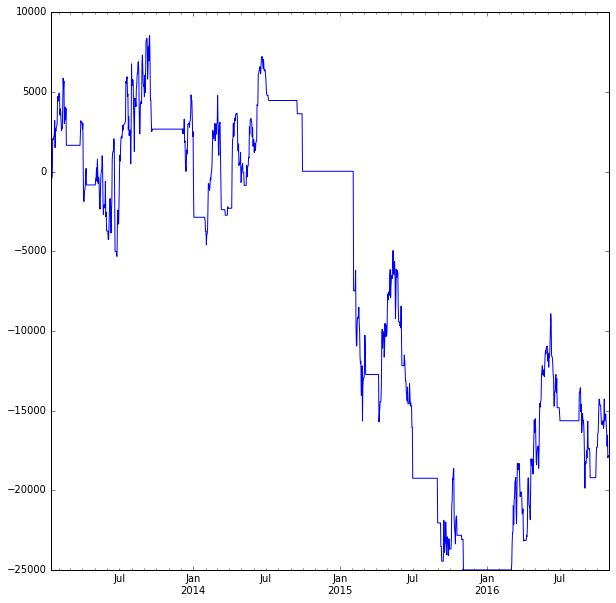

In [186]:
smgr.strategy.exoinfo.data.exo.plot()

### Global filter information (obsolete)


## Costs information (per 1-exo unit)

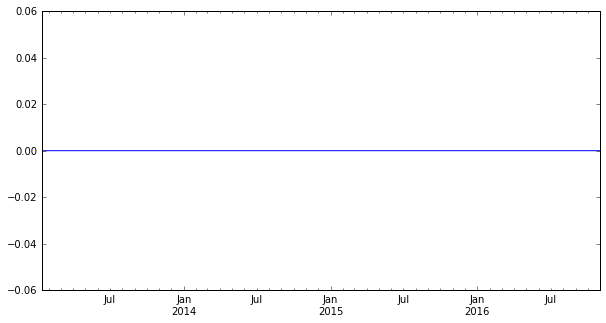

In [187]:
figsize(10,5)
smgr.strategy.costs.plot()

## Margin graphs

### EXO Margin (per 1 EXO unit)

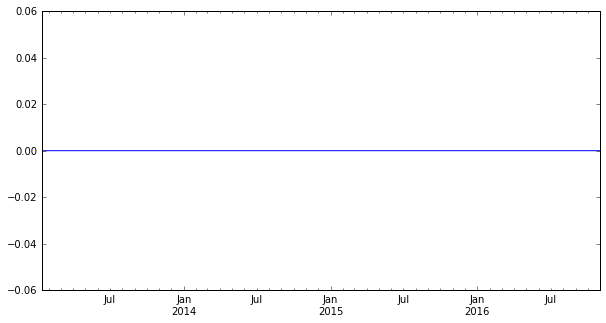

In [188]:
smgr.strategy.exoinfo.margin().plot()

# Saving results

In [189]:
smgr.save('./swarms/')